In [1]:
#NumStreet: number of homeless people counted in the street (numeric - decimal) 
#FemalePctDiv: percentage of females who are divorced (numeric - decimal) 
#MalePctDivorce: percentage of males who are divorced (numeric - decimal)
#PctPopUnderPov
#PctVacantBoarded

df <- read.csv(file = 'crimedata.csv')
df <- df[complete.cases(df[,c('ViolentCrimesPerPop',
                        'medFamInc','PctBSorMore', 
                        'PctUnemployed', 'LemasTotalReq', 
                        'PolicCars', 'PctNotSpeakEnglWell')]),]

df <- within(df, rm(X))
nrow(df)

[1] 319

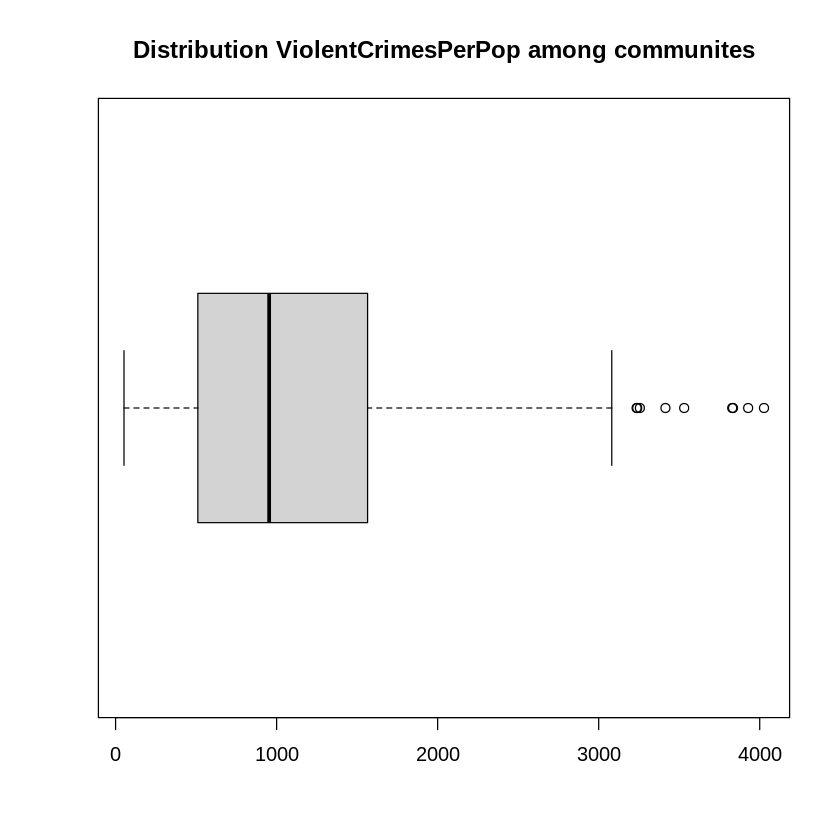

In [2]:
boxplot(df$ViolentCrimesPerPop,horizontal=TRUE, main="Distribution ViolentCrimesPerPop among communites")

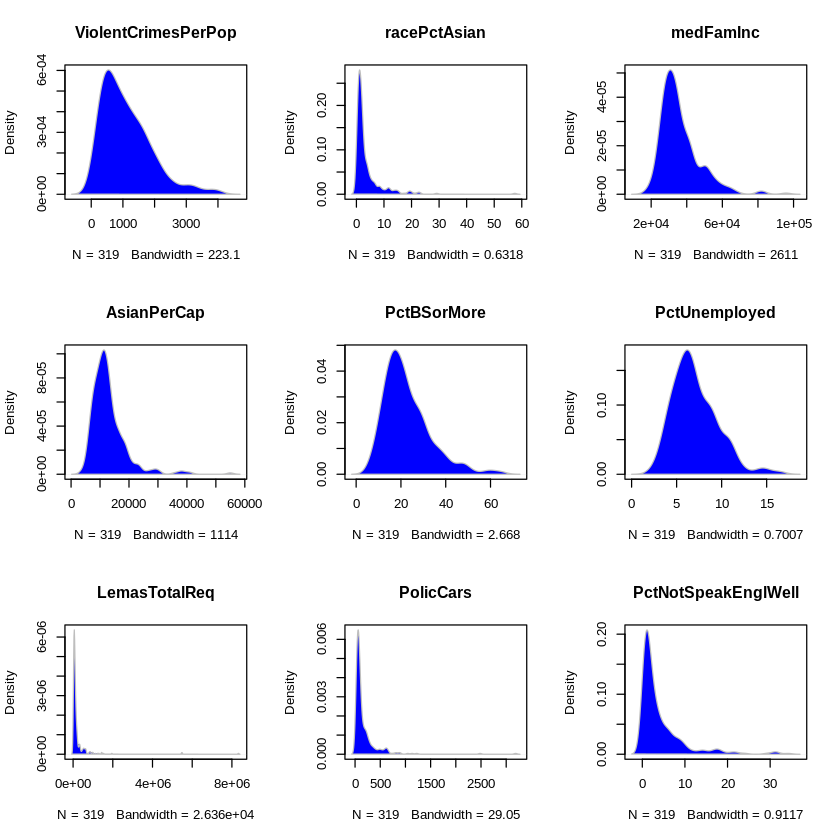

In [3]:
par(mfrow=c(3, 3))


colnames <- c('ViolentCrimesPerPop','racePctAsian',
                        'medFamInc','AsianPerCap', 'PctBSorMore', 
                        'PctUnemployed', 'LemasTotalReq', 
                        'PolicCars', 'PctNotSpeakEnglWell')
for (i in colnames) {
    d <- density(df[,i])
    plot(d, type="n", main=i)
    polygon(d, col="blue", border="gray")
}

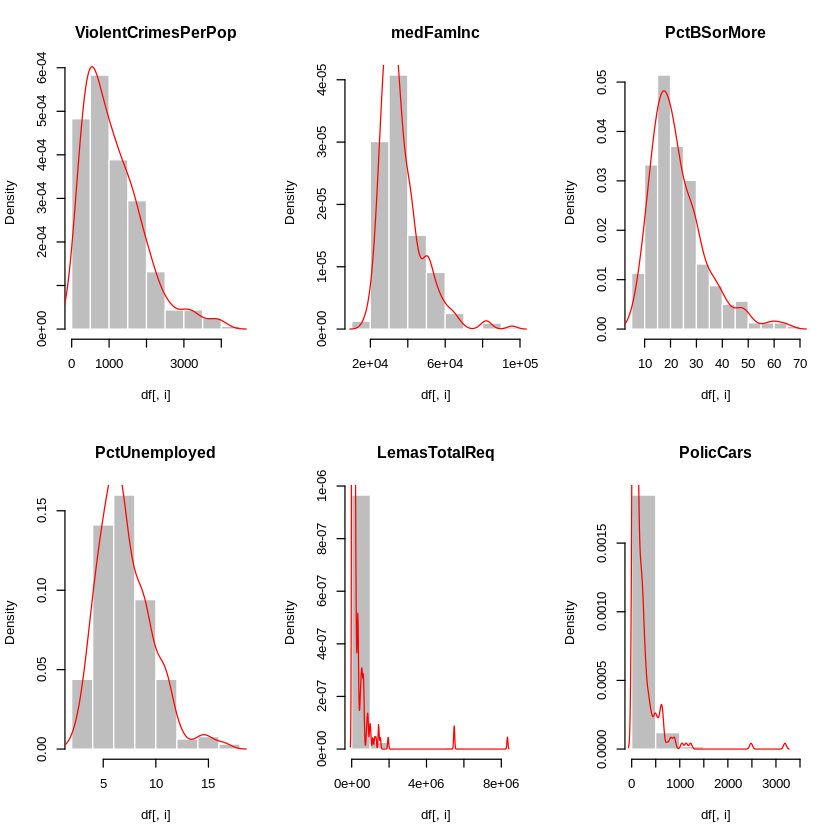

In [4]:
# Histograms and density lines
par(mfrow=c(2, 3))
colnames <- c('ViolentCrimesPerPop',
                        'medFamInc','PctBSorMore', 
                        'PctUnemployed', 'LemasTotalReq', 
                        'PolicCars')
for (i in colnames) {
    hist(df[,i], main=i, probability=TRUE, col="gray", border="white")
    d <- density(df[,i])
    lines(d, col="red")
}

In [5]:
#install.packages("ggpubr")
#install.packages("corrplot")
#install.packages("leaps")
library(ggplot2)
library(ggpubr)
library(corrplot)
library(leaps)
library(car)

corrplot 0.92 loaded

Loading required package: carData



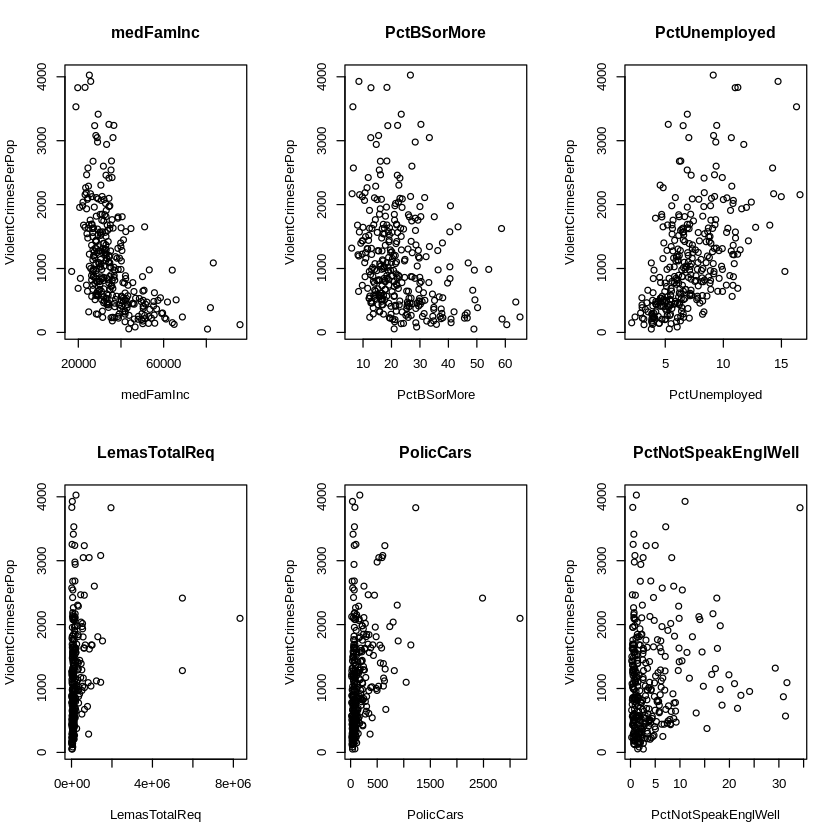

In [7]:
#'racePctAsian', 'AsianPerCap'

par(mfrow=c(2,3))
colnames <- c('medFamInc','PctBSorMore', 
              'PctUnemployed', 'LemasTotalReq', 
              'PolicCars', 'PctNotSpeakEnglWell')

for (i in colnames) {
    plot(df[,i], df[,'ViolentCrimesPerPop'], main=i, 
   xlab=i, ylab="ViolentCrimesPerPop")
}

,medFamInc,PctBSorMore,PctUnemployed,LemasTotalReq,PolicCars,PctNotSpeakEnglWell
medFamInc,1.00000000,0.69956538,-0.6673173,-0.10295206,-0.16824971,-0.09688874
PctBSorMore,0.69956538,1.00000000,-0.6032899,-0.03291228,-0.02126002,-0.22621966
PctUnemployed,-0.66731727,-0.60328992,1.0000000,0.11793448,0.09519120,0.33937788
LemasTotalReq,-0.10295206,-0.03291228,0.1179345,1.00000000,0.85897494,0.14675239
PolicCars,-0.16824971,-0.02126002,0.0951912,0.85897494,1.00000000,0.09972871
PctNotSpeakEnglWell,-0.09688874,-0.22621966,0.3393779,0.14675239,0.09972871,1.00000000


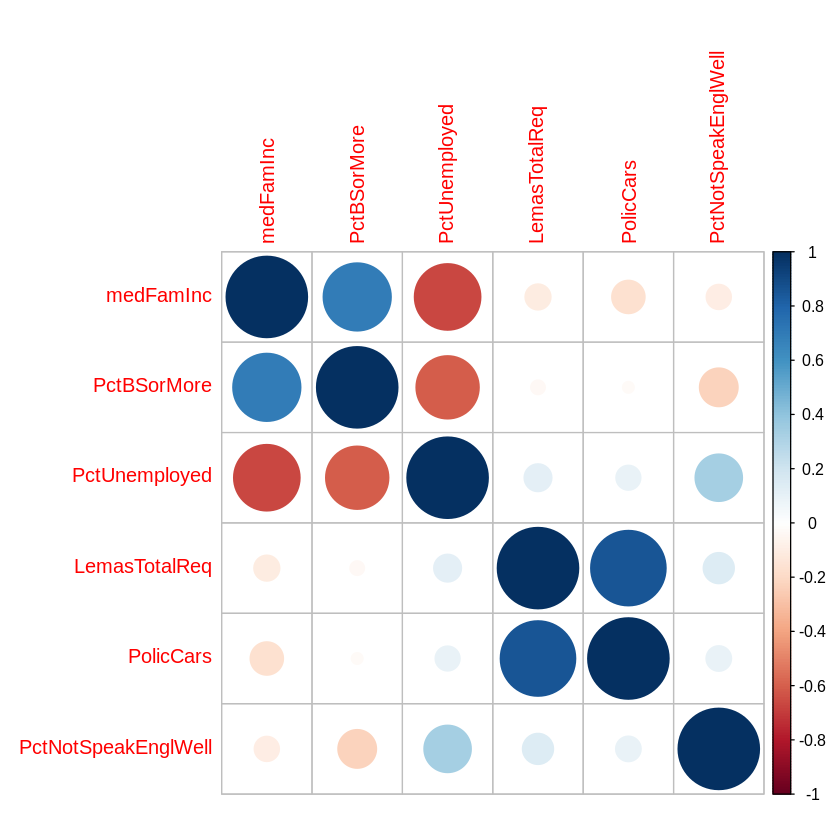

In [8]:
data <- as.matrix(df[ , colnames] )
data.cor = cor(data, method = c("pearson"))
corrplot(data.cor)
data.cor

Subset selection object
Call: regsubsets.formula(ViolentCrimesPerPop ~ ., data = df[, colnames], 
    nbest = 1, method = "exhaustive", really.big = TRUE)
6 Variables  (and intercept)
                    Forced in Forced out
medFamInc               FALSE      FALSE
PctBSorMore             FALSE      FALSE
PctUnemployed           FALSE      FALSE
LemasTotalReq           FALSE      FALSE
PolicCars               FALSE      FALSE
PctNotSpeakEnglWell     FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: exhaustive
         medFamInc PctBSorMore PctUnemployed LemasTotalReq PolicCars
1  ( 1 ) " "       " "         "*"           " "           " "      
2  ( 1 ) " "       " "         "*"           " "           "*"      
3  ( 1 ) "*"       " "         "*"           " "           "*"      
4  ( 1 ) "*"       "*"         "*"           " "           "*"      
5  ( 1 ) "*"       "*"         "*"           "*"           "*"      
6  ( 1 ) "*"       "*"         "*"           "*"    

ERROR: Error in legend(if (!is.na(charmatch(legend[1], "interactive"))) locator(1) else if (is.character(legend)) legend else if (is.numeric(legend) && : invalid coordinate lengths


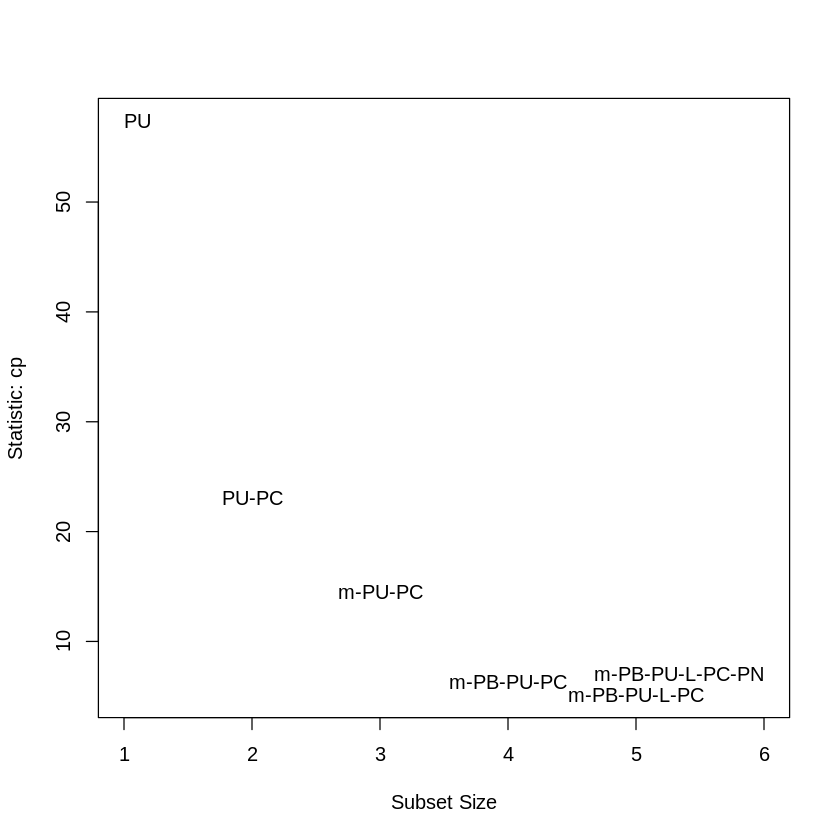

In [9]:
colnames <- c('ViolentCrimesPerPop',
                        'medFamInc','PctBSorMore', 
                        'PctUnemployed', 'LemasTotalReq', 
                        'PolicCars', 'PctNotSpeakEnglWell')

leaps <- regsubsets(ViolentCrimesPerPop~. , data=df[, colnames], nbest=1, method='exhaustive', really.big=TRUE)
summary(leaps)
subsets(leaps, statistic='cp')

In [10]:
colnames <- c('medFamInc', 'PctBSorMore', 
                        'PctUnemployed', 'LemasTotalReq', 
                        'PolicCars', 'PctNotSpeakEnglWell')

leaps(x=as.matrix(df[ , colnames]), y=df$ViolentCrimesPerPop, method="adjr2", nbest=1)

,1,2,3,4,5,6
1,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
2,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE
3,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE
4,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
5,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
6,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE



Call:
lm(formula = ViolentCrimesPerPop ~ medFamInc + PctBSorMore + 
    PctUnemployed + LemasTotalReq + PolicCars, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1465.98  -356.25   -79.67   240.05  2346.51 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.820e+02  2.716e+02   1.406  0.16058    
medFamInc     -1.987e-02  4.953e-03  -4.011 7.57e-05 ***
PctBSorMore    1.451e+01  4.776e+00   3.038  0.00258 ** 
PctUnemployed  1.402e+02  1.908e+01   7.347 1.78e-12 ***
LemasTotalReq -1.814e-04  1.018e-04  -1.782  0.07569 .  
PolicCars      9.929e-01  2.433e-01   4.081 5.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 611.4 on 313 degrees of freedom
Multiple R-squared:  0.4033,	Adjusted R-squared:  0.3938 
F-statistic: 42.31 on 5 and 313 DF,  p-value: < 2.2e-16


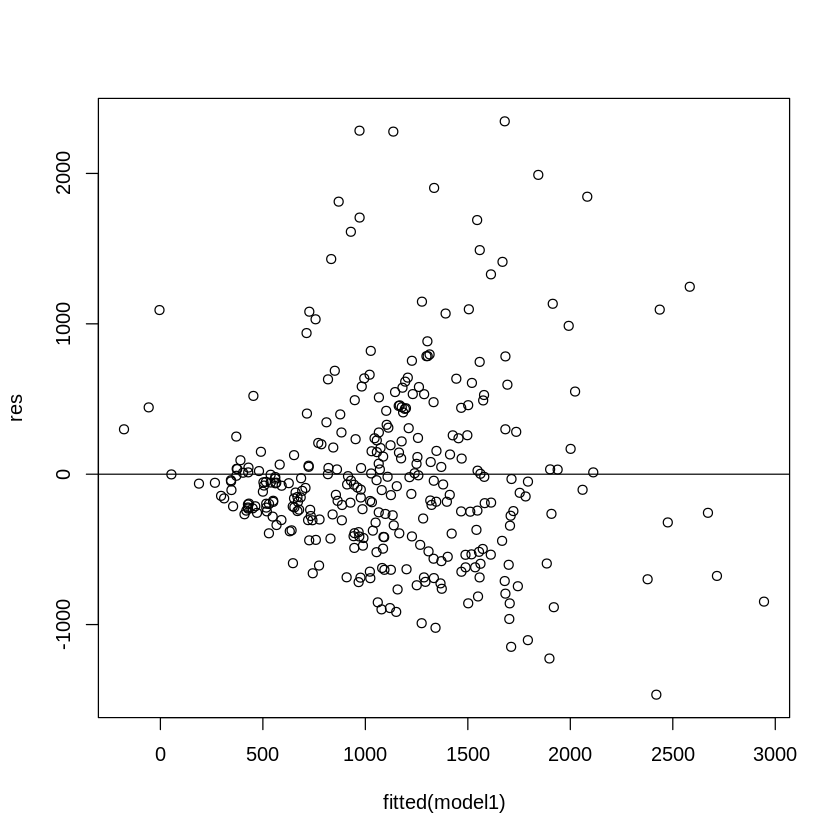

2053 1152 
 293  163

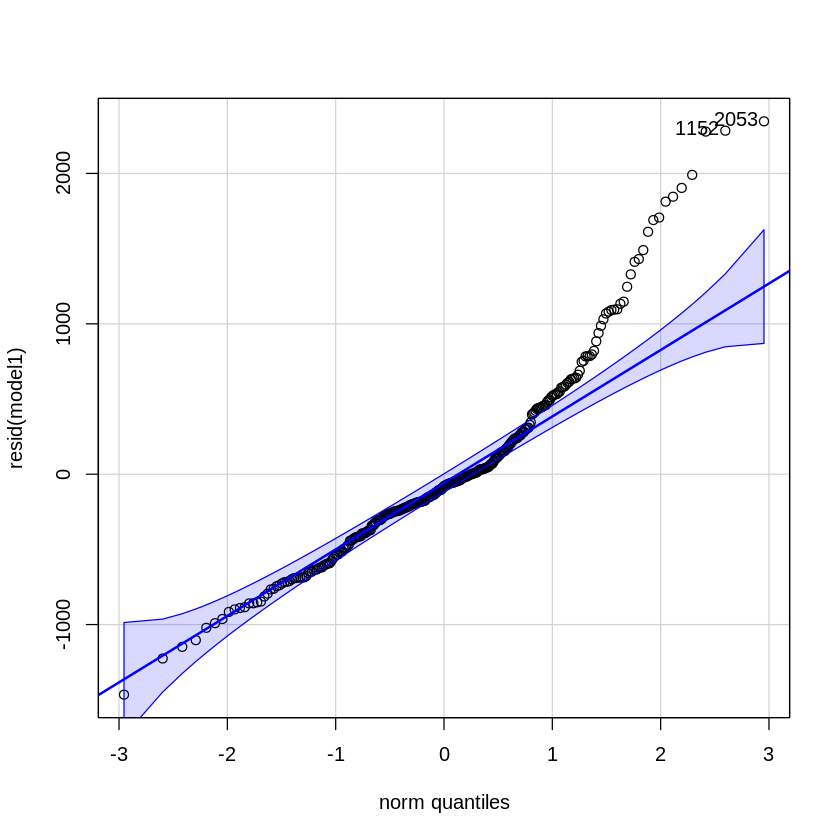

In [11]:
model1 <- lm(ViolentCrimesPerPop ~ medFamInc + PctBSorMore + PctUnemployed + LemasTotalReq + PolicCars, data=df)
summary(model1)


res <- resid(model1)
plot(fitted(model1), res)
abline(0,0)

qqPlot(resid(model1))


Call:
lm(formula = log(ViolentCrimesPerPop) ~ log(medFamInc) + log(PctBSorMore) + 
    log(PctUnemployed) + log(LemasTotalReq) + log(PolicCars), 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0896 -0.3660  0.0282  0.3825  1.6349 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        11.35924    2.26920   5.006 9.30e-07 ***
log(medFamInc)     -0.82112    0.20366  -4.032 6.95e-05 ***
log(PctBSorMore)    0.12970    0.10431   1.243   0.2147    
log(PctUnemployed)  0.85053    0.15224   5.587 5.03e-08 ***
log(LemasTotalReq)  0.11335    0.04922   2.303   0.0219 *  
log(PolicCars)      0.14192    0.05902   2.405   0.0168 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.564 on 313 degrees of freedom
Multiple R-squared:  0.5076,	Adjusted R-squared:  0.4997 
F-statistic: 64.53 on 5 and 313 DF,  p-value: < 2.2e-16


log(medFamInc)   log(PctBSorMore) log(PctUnemployed) log(LemasTotalReq) 
          3.118407           2.127149           2.906309           2.813640 
    log(PolicCars) 
          3.045353

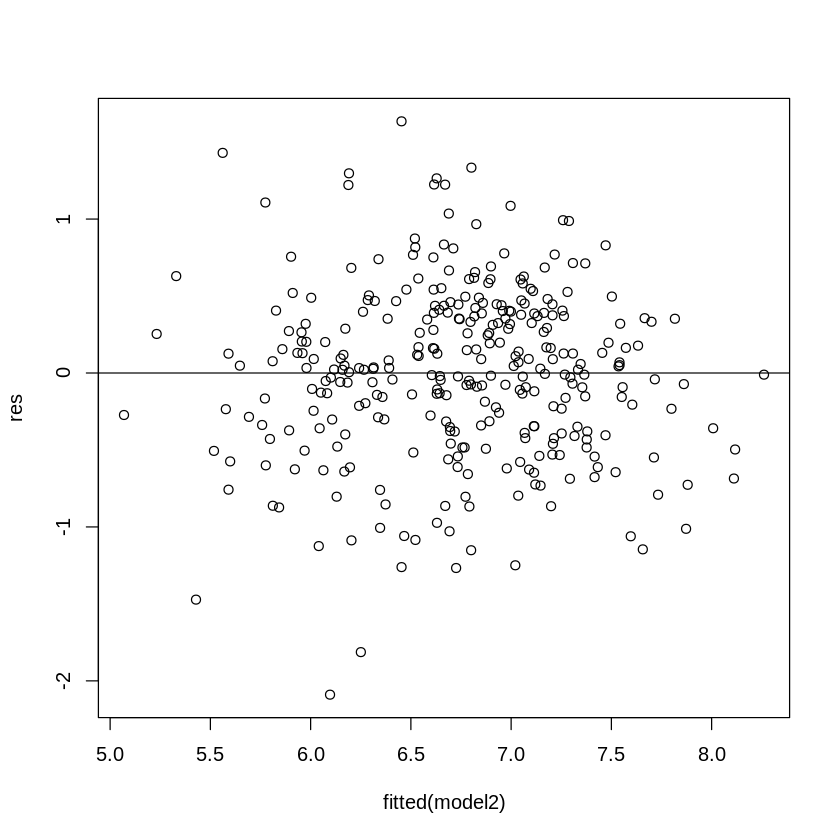

641 1366 
  80  191

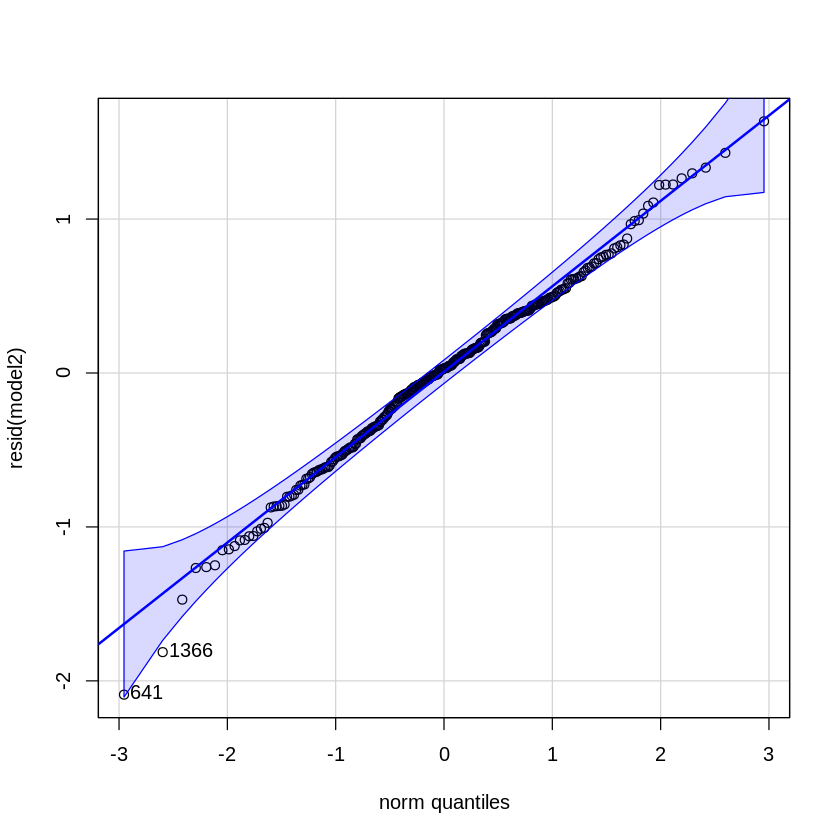

In [12]:
model2 <- lm(log(ViolentCrimesPerPop) ~ log(medFamInc) + log(PctBSorMore) + log(PctUnemployed) + log(LemasTotalReq) + log(PolicCars), data=df)
summary(model2)

res <- resid(model2)
plot(fitted(model2), res)
abline(0,0)


vif(model2)
qqPlot(resid(model2))

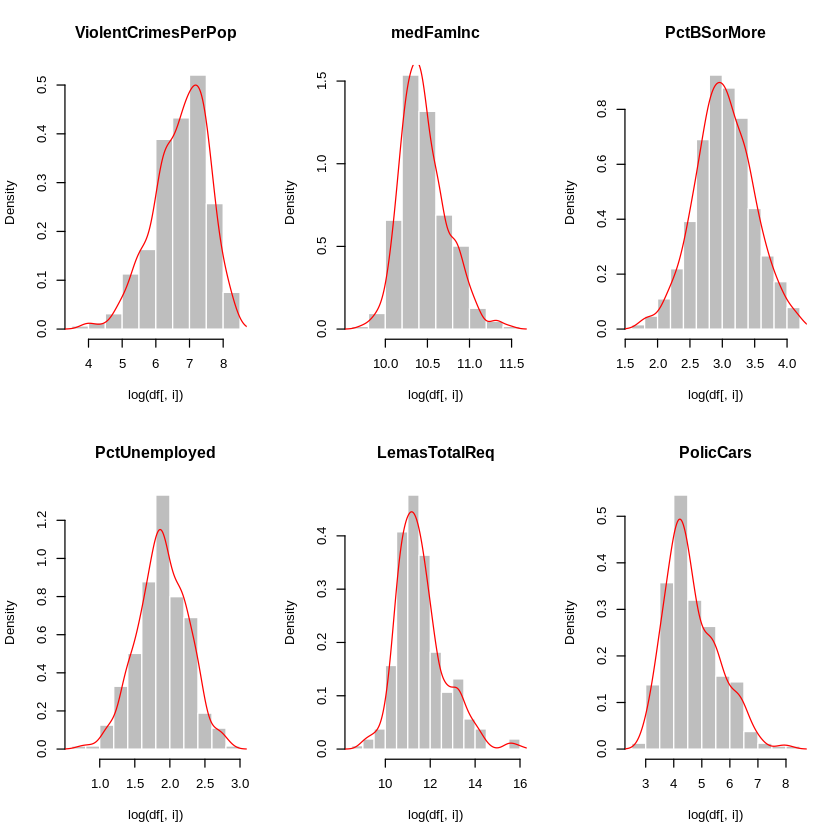

In [13]:
par(mfrow=c(2, 3))
colnames <- c('ViolentCrimesPerPop',
                        'medFamInc','PctBSorMore', 
                        'PctUnemployed', 'LemasTotalReq', 
                        'PolicCars')
for (i in colnames) {
    hist(log(df[,i]), main=i, probability=TRUE, col="gray", border="white")
    d <- density(log(df[,i]))
    lines(d, col="red")
}


Call:
lm(formula = log(ViolentCrimesPerPop) ~ centered_medFamInc + 
    centered_PctBSorMore + centered_PctUnemployed + centered_LemasTotalReq + 
    centered_PolicCars, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2406 -0.3591  0.0256  0.3725  1.8708 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.74447    0.03267 206.430  < 2e-16 ***
centered_medFamInc     -0.35219    0.05264  -6.690 1.03e-10 ***
centered_PctBSorMore    0.12950    0.04799   2.699 0.007342 ** 
centered_PctUnemployed  0.28042    0.04593   6.105 3.04e-09 ***
centered_LemasTotalReq -0.10929    0.06529  -1.674 0.095150 .  
centered_PolicCars      0.25468    0.06618   3.848 0.000144 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5835 on 313 degrees of freedom
Multiple R-squared:  0.473,	Adjusted R-squared:  0.4645 
F-statistic: 56.18 on 5 and 313 DF,  p-value: < 2.2e-16


centered_medFamInc   centered_PctBSorMore centered_PctUnemployed 
              2.588131               2.150605               1.970198 
centered_LemasTotalReq     centered_PolicCars 
              3.980744               4.090147

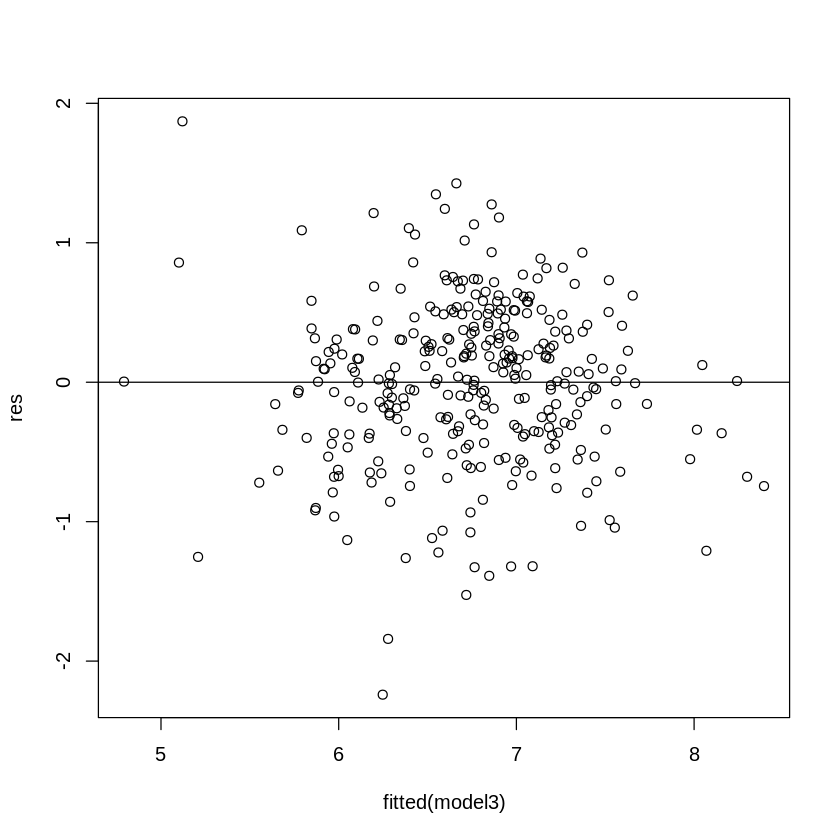

In [19]:
df$centered_medFamInc <- scale(df$medFamInc)
df$centered_PctBSorMore <- scale(df$PctBSorMore)
df$centered_PctUnemployed <- scale(df$PctUnemployed)
df$centered_LemasTotalReq <- scale(df$LemasTotalReq)
df$centered_PolicCars <- scale(df$PolicCars)

model3 <- lm(log(ViolentCrimesPerPop) ~ centered_medFamInc + centered_PctBSorMore + 
             centered_PctUnemployed + centered_LemasTotalReq + centered_PolicCars, data=df)
summary(model3)

res <- resid(model3)
plot(fitted(model3), res)
abline(0,0)
vif(model3)


Call:
lm(formula = log(ViolentCrimesPerPop) ~ log(medFamInc) + log(PctBSorMore) + 
    log(PctUnemployed) + log(LemasTotalReq) + log(PolicCars) + 
    log(PctBSorMore) * log(medFamInc) + log(PctBSorMore) * log(PctUnemployed) + 
    log(PctBSorMore) * log(LemasTotalReq) + log(PctBSorMore) * 
    log(PolicCars), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.04546 -0.35313  0.02095  0.37513  1.63147 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)                         22.35122   15.42118   1.449   0.1482  
log(medFamInc)                      -1.56542    1.28927  -1.214   0.2256  
log(PctBSorMore)                    -3.51705    5.01179  -0.702   0.4834  
log(PctUnemployed)                   0.91926    0.92249   0.997   0.3198  
log(LemasTotalReq)                   0.20719    0.39702   0.522   0.6021  
log(PolicCars)                      -0.86877    0.45753  -1.899   0.0585 .
log(medFamInc):log(PctBSorMore) 

log(medFamInc)                    log(PctBSorMore) 
                          128.18738                          5036.33725 
                 log(PctUnemployed)                  log(LemasTotalReq) 
                          109.45347                           187.77123 
                     log(PolicCars)     log(medFamInc):log(PctBSorMore) 
                          187.69618                          4846.93301 
log(PctBSorMore):log(PctUnemployed) log(PctBSorMore):log(LemasTotalReq) 
                           67.34138                           618.47716 
    log(PctBSorMore):log(PolicCars) 
                          277.95034

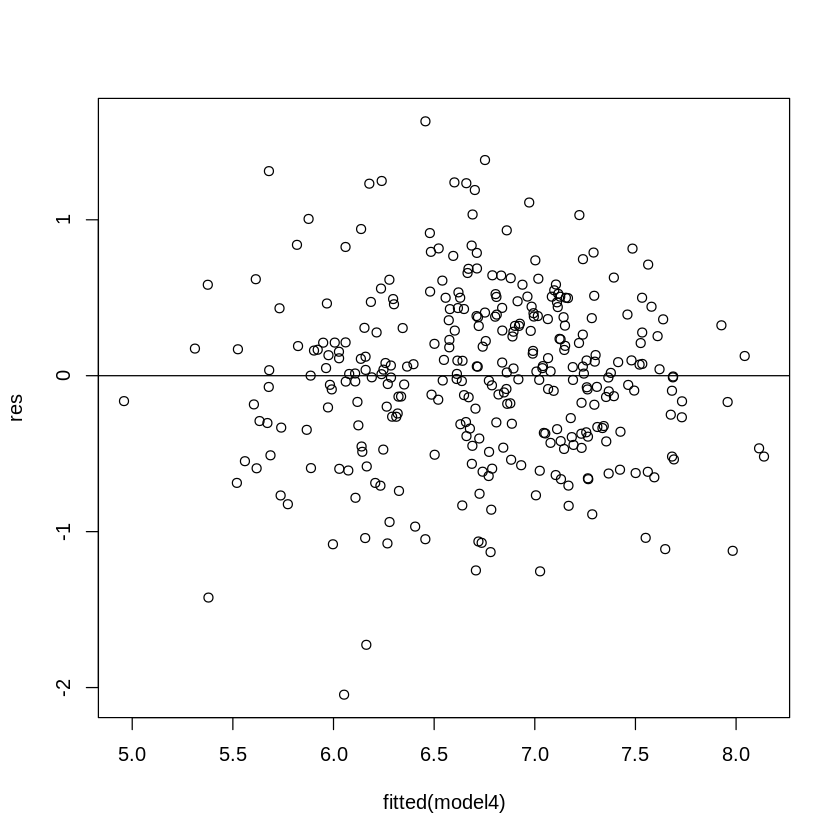

In [15]:
model4 <- lm(log(ViolentCrimesPerPop) ~ log(medFamInc) + log(PctBSorMore) + log(PctUnemployed) + log(LemasTotalReq) + log(PolicCars) + log(PctBSorMore)*log(medFamInc) + log(PctBSorMore)*log(PctUnemployed) + log(PctBSorMore)*log(LemasTotalReq) + log(PctBSorMore)*log(PolicCars), data=df)
summary(model4)

res <- resid(model4)
plot(fitted(model4), res)
abline(0,0)

vif(model4)


Call:
lm(formula = log(ViolentCrimesPerPop) ~ log(medFamInc) + log(PctBSorMore) + 
    log(PctUnemployed) + log(LemasTotalReq) + log(PolicCars) + 
    log(PctBSorMore) * log(PolicCars), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.08190 -0.36759  0.02365  0.36560  1.63029 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     14.28480    2.40891   5.930 8.03e-09 ***
log(medFamInc)                  -0.75325    0.20168  -3.735 0.000223 ***
log(PctBSorMore)                -1.10032    0.39139  -2.811 0.005247 ** 
log(PctUnemployed)               0.86932    0.15007   5.793 1.69e-08 ***
log(LemasTotalReq)               0.12190    0.04855   2.511 0.012554 *  
log(PolicCars)                  -0.71819    0.27042  -2.656 0.008317 ** 
log(PctBSorMore):log(PolicCars)  0.28061    0.08616   3.257 0.001250 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5556

log(medFamInc)                log(PctBSorMore) 
                       3.152059                       30.865380 
             log(PctUnemployed)              log(LemasTotalReq) 
                       2.910609                        2.821888 
                 log(PolicCars) log(PctBSorMore):log(PolicCars) 
                      65.887179                       93.863063

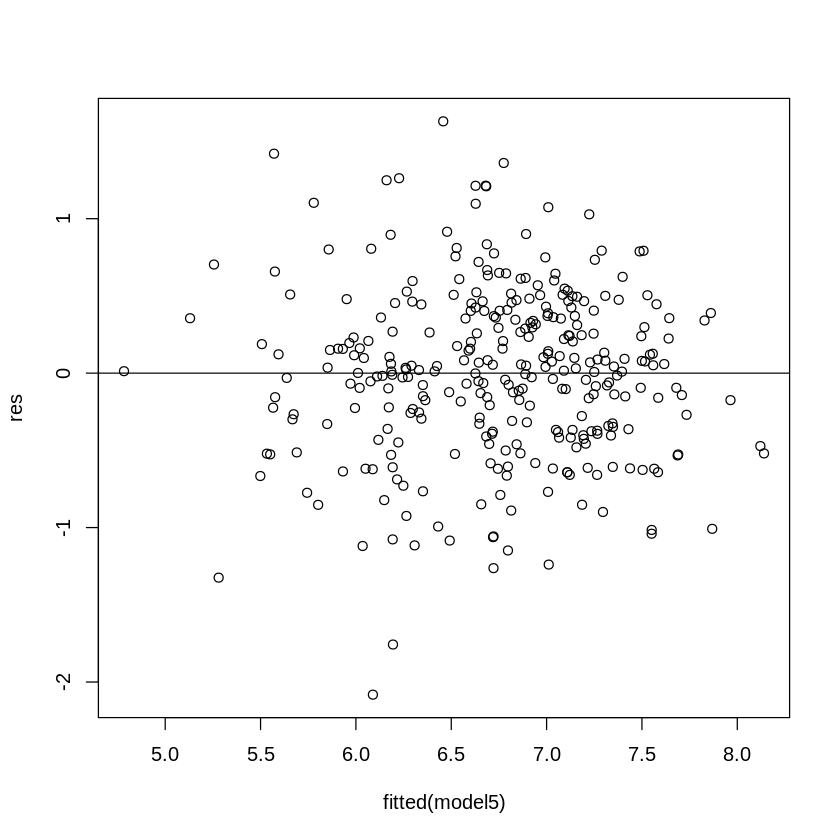

In [16]:
model5 <- lm(log(ViolentCrimesPerPop) ~ log(medFamInc) + log(PctBSorMore) + log(PctUnemployed) + log(LemasTotalReq) + log(PolicCars) + log(PctBSorMore)*log(PolicCars), data=df)
summary(model5)

res <- resid(model5)
plot(fitted(model5), res)
abline(0,0)

vif(model5)

641 1366 
  80  191

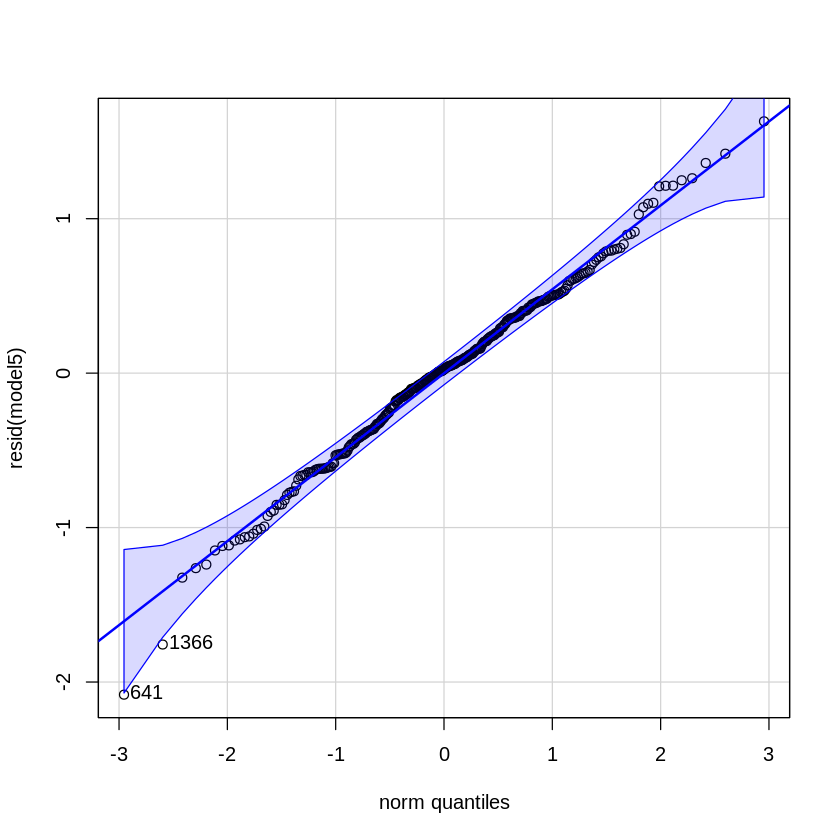

In [17]:
qqPlot(resid(model5))

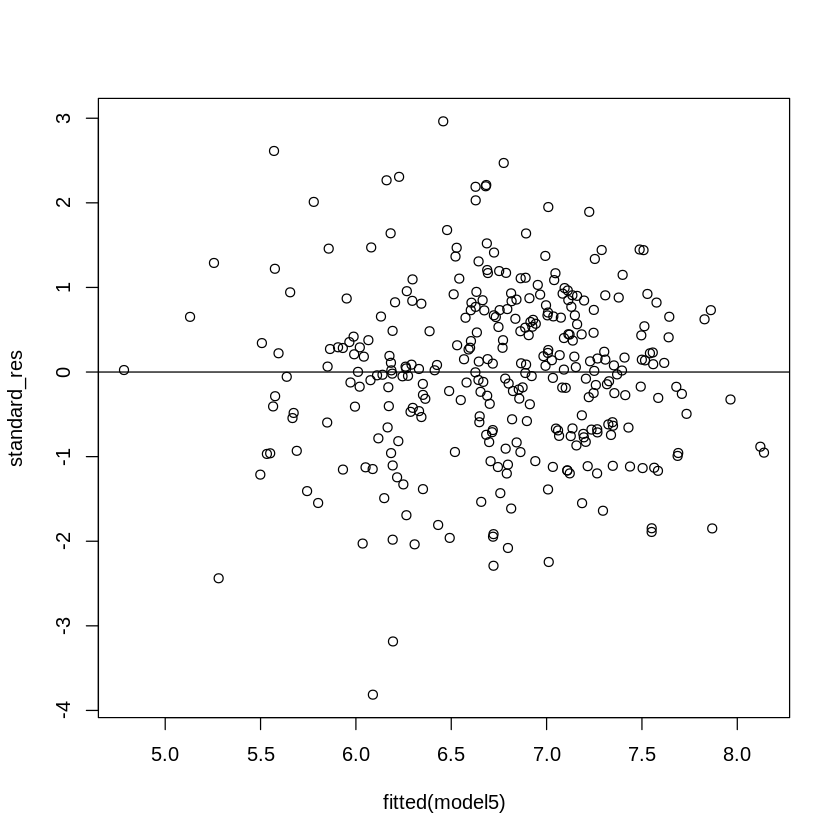

In [18]:
standard_res <- rstandard(model5)
plot(fitted(model5), standard_res)
abline(0,0)